In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# GENERAL PLOT OPTIONS
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['ytick.major.size'] = 6
matplotlib.rcParams['ytick.major.width'] = 1.2
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.8
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['legend.title_fontsize'] = 18
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'
matplotlib.rcParams['savefig.dpi'] = 300

from scipy.interpolate import interp1d
from scipy.integrate import quad

import itertools
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
def make_style_iter():
    #markers    = ['o', 's', '^', 'D', 'v', 'P', 'X', '*']
    markers = ['o', '^', '*']
    linewidths = [1.8, 2.6]
    linestyles = ['-', '--', '-.', ':']
    return itertools.cycle(itertools.product(markers, linewidths, linestyles))

cmap = plt.get_cmap("cividis")
colors = cmap(np.arange(0, 2)/1)

styles = make_style_iter()
lw,ls,mk = next(styles)

In [ ]:
import getdist
from getdist import loadMCSamples

mcmc_filepath = '/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_real/chains/roman_lcdm_baseline_mcmc/'
fisher_filepath = '/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_real/chains/roman_wcdm_baseline_mcmc/'

def load(filepath, settings):
    samples = loadMCSamples(filepath, settings=settings)
    samples.thin(50)
    p = samples.getParams()
    s8 = p.sigma8*(p.omegam/0.3)**0.5
    try:
        samples.addDerived(
            s8,
            'S8',
            label = r'S_8',
        )
    except:
        True
    # clear wrong latex  
    pn = samples.getParamNames()
    latex_As = r'10^{9} A_{\rm s}'
    for p in pn.names:
        if p.name.lower() == 'omegan':
            p.label = r'\Omega_{\nu}'
        if p.name == 'As_1e9':
            p.label = latex_As
    return samples
settings = {'ignore_rows':0.3, 'contours': [0.68,0.95]}
mcmc_sample = load(mcmc_filepath, settings = settings)
fisher_smaple = load(fisher_filepath, settings = settings)

/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_real/chains/roman_lcdm_baseline_mcmc/1.txt
/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_real/chains/roman_lcdm_baseline_mcmc/2.txt
/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_real/chains/roman_lcdm_baseline_mcmc/3.txt
/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_real/chains/roman_lcdm_baseline_mcmc/4.txt
Removed 0.3 as burn in
/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_real/chains/roman_wcdm_baseline_mcmc/1.txt
/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_real/chains/roman_wcdm_baseline_mcmc/2.txt
/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_real/chains/roman_wcdm_baseline_mcmc/3.txt
/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_real/chains/roman_wcdm_baseline_mcmc/4.txt
Removed 0.3 as burn in


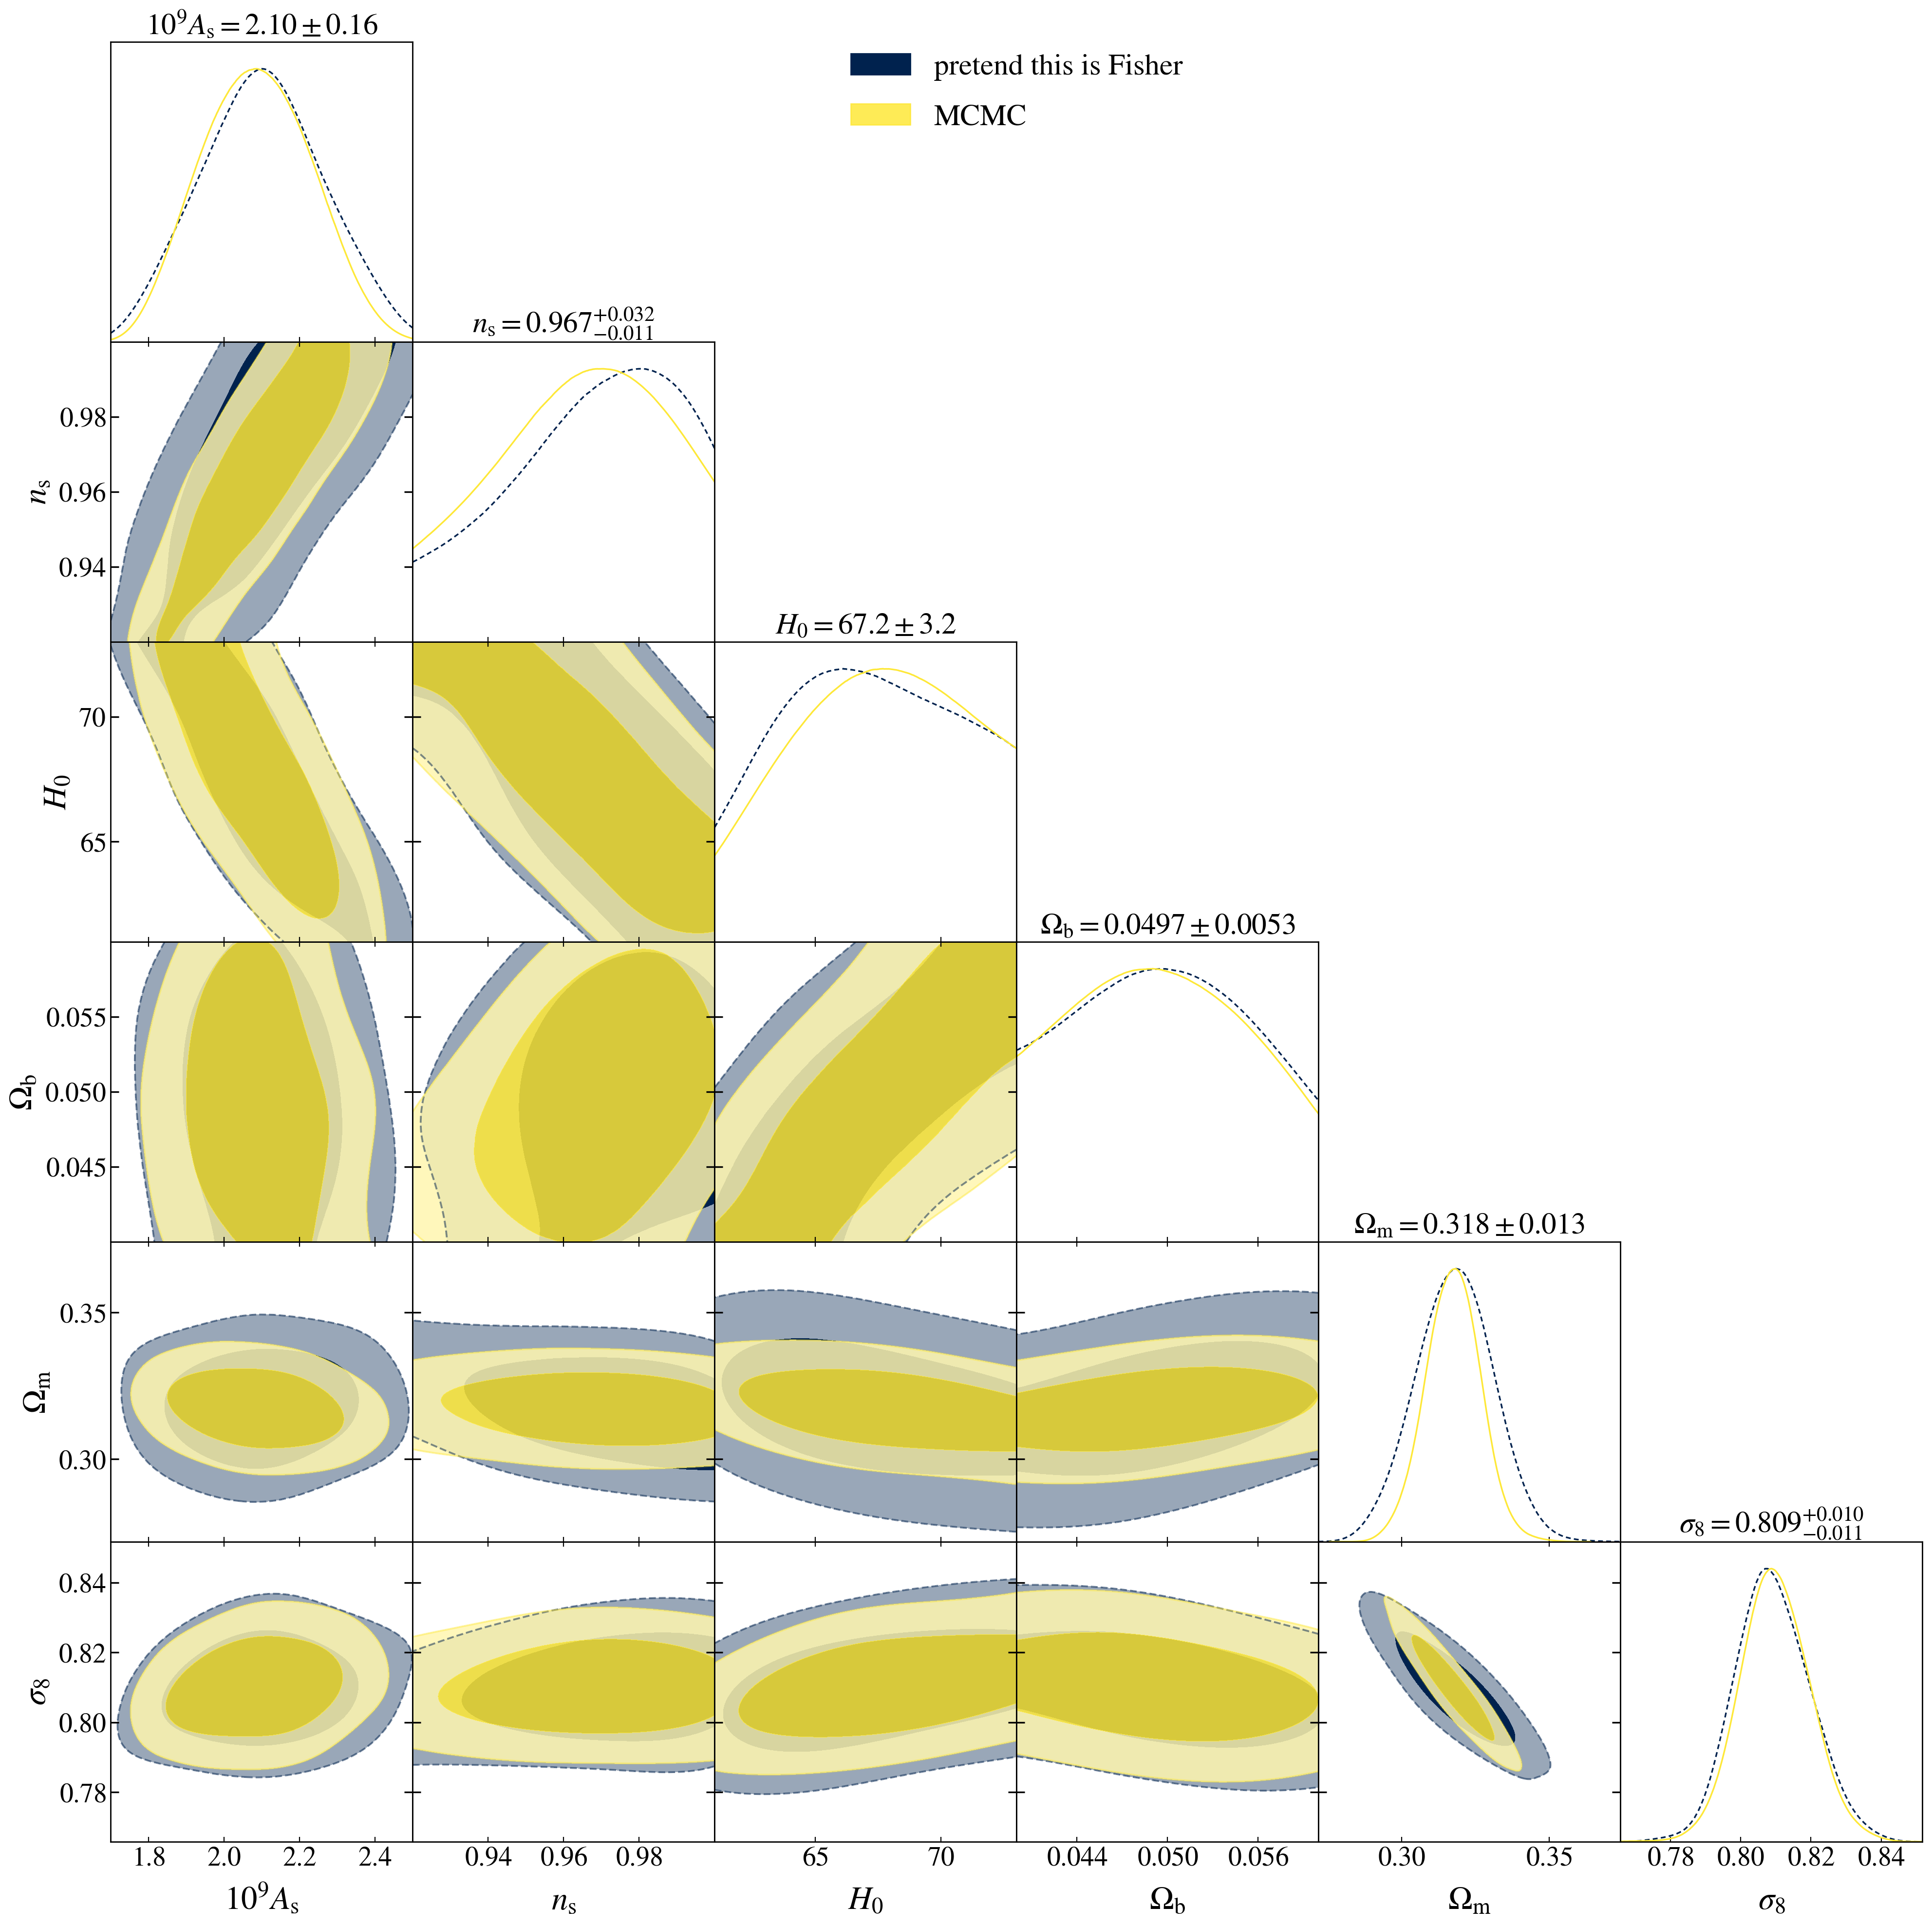

In [34]:
from getdist import plots
g = plots.get_subplot_plotter(subplot_size=4)
g.settings.title_limit = 1            
g.settings.title_limit_labels = True  
g.settings.title_limit_fontsize = 22
g.settings.lab_fontsize=24
g.settings.legend_fontsize=22
g.settings.figure_legend_frame = False
g.settings.axes_fontsize = 20
g.settings.axes_labelsize = 24
g.settings.axis_tick_max_labels = 4
params = ['As_1e9','ns','H0','omegab','omegam','sigma8']
#cosmo_fid = {Str:fiducials[Str] for Str in params}
g.triangle_plot([fisher_smaple, mcmc_sample], params=params, filled=True,
                marker_args={'ls':'--','lw':1.2,'color':'k','alpha':0.8},
                legend_labels=['pretend this is Fisher', 'MCMC'],
                legend_loc='upper center',
                contour_args=[{'ls': '--', 'lw': 1.2, 'color': colors[0]},{'ls': '-',  'lw': 1.2, 'color': colors[1]},],
                line_args=[{'ls': '--', 'lw': 1.2, 'color': colors[0]},{'ls': '-',  'lw': 1.2, 'color': colors[1]},],
                )
g.export('fishervsmcmc.png', dpi=300)